In [1]:
import joblib 
import numpy as np 
from matplotlib import pyplot as plt 
from uncertainties import ufloat, unumpy

from pathlib import Path
from tqdm import tqdm
from numpy import array
import sys
sys.path.append("..")
from core.utils import *
import atlas_mpl_style as ampl
#ampl.use_atlas_style(usetex=False)
import random
import mplhep as hep
hep.style.use("ATLAS")

In [2]:
pkl_path = '/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/NewWorkflow/trained_lightGBM_new_hrzhao'
#pkl_path = '/global/cfs/projectdirs/atlas/wys/HEP_Repo/QG_Calibration/eta_dependency_eta_bin/nominal_eta_binned/nominal'
pkl_path = Path(pkl_path)

In [3]:
reweighting_vars = ['jet_nTracks', 'GBDT_newScore']
nominal_keys = [reweighting_var + '_quark_reweighting_weights' for reweighting_var in reweighting_vars]
WPs = [0.5, 0.6, 0.7, 0.8]
label_eta_bin = [0, 0.5, 1.0, 1.5, 2.1]

Map_var_title = {
    "jet_pt": "$p_{T}$",
    "jet_nTracks": "$n_{trk}$",
    "jet_trackBDT": "old BDT",
    "jet_eta": "$\eta$",
    "jet_trackC1": "$C_{1}$",
    "jet_trackWidth": "$w^{trk}$",
    "GBDT_newScore": "BDT"
}


In [4]:
syst_total = joblib.load("/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/syst_uncertainties/syst_total.pkl")
#syst_total = joblib.load('/global/cfs/projectdirs/atlas/hrzhao/HEP_Repo/QG_Calibration/NewWorkflow/syst_uncertainties/syst_total.pkl')

Quark jet_nTracks SF:  [1.02793334 1.04433293 1.04619375 1.0334767  1.02044958 1.00974996] syst:  [0.18587531 0.19165695 0.21063918 0.20646442 0.21491205 0.19170222]
Gluon jet_nTracks SF:  [0.99763966 0.99182636 0.98358126 0.96500029 0.94417689 0.92461817] syst:  [0.10974434 0.11961841 0.13465386 0.15066927 0.14896318 0.18231611]
Quark jet_nTracks SF:  [1.03289557 1.04472296 1.04658849 1.0335629  1.01778312 1.01783619] syst:  [0.16132754 0.16632501 0.18325037 0.17885396 0.18322212 0.16616285]
Gluon jet_nTracks SF:  [0.99561582 0.98741411 0.97820381 0.95756434 0.92650475 0.91805623] syst:  [0.16619703 0.1786766  0.18430041 0.19715007 0.20183094 0.25167361]
Quark jet_nTracks SF:  [1.03522057 1.04309822 1.04446239 1.03466681 1.02319829 1.00653499] syst:  [0.14215874 0.14335998 0.15930069 0.15784688 0.14867612 0.12604227]
Gluon jet_nTracks SF:  [0.99452661 0.98337935 0.97226114 0.95322809 0.91903526 0.87455204] syst:  [0.22941428 0.23560804 0.24472003 0.26355231 0.28470973 0.35201324]
Quar

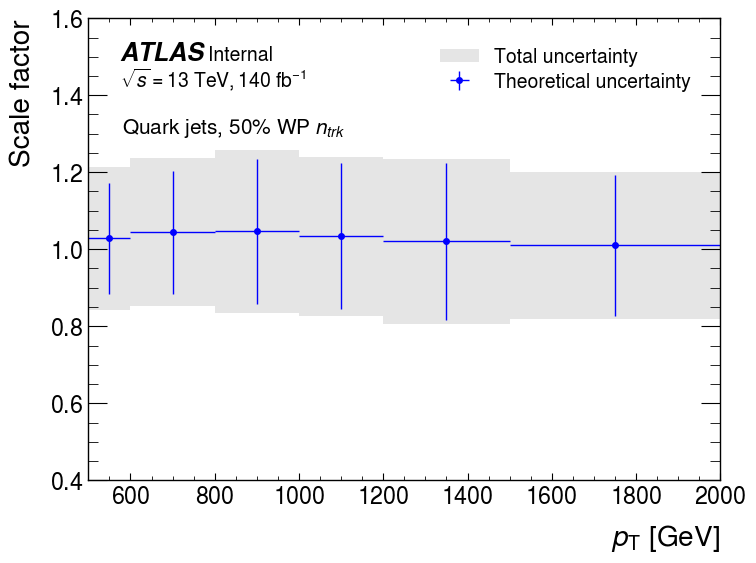

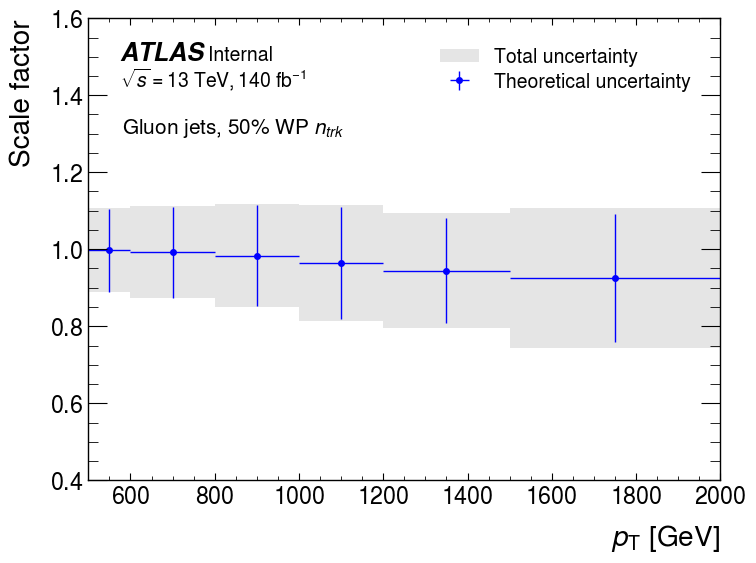

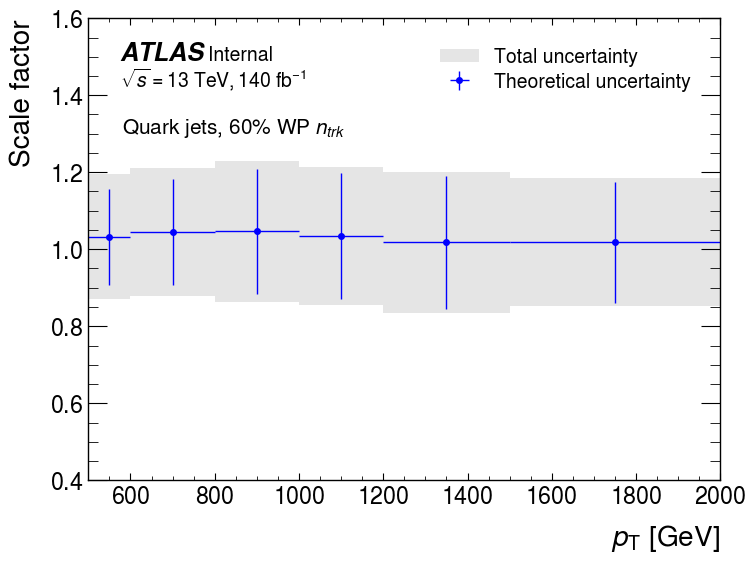

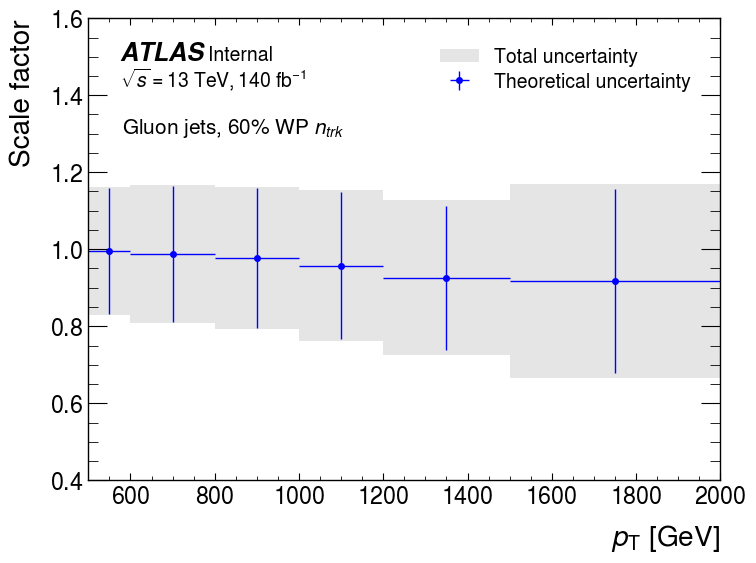

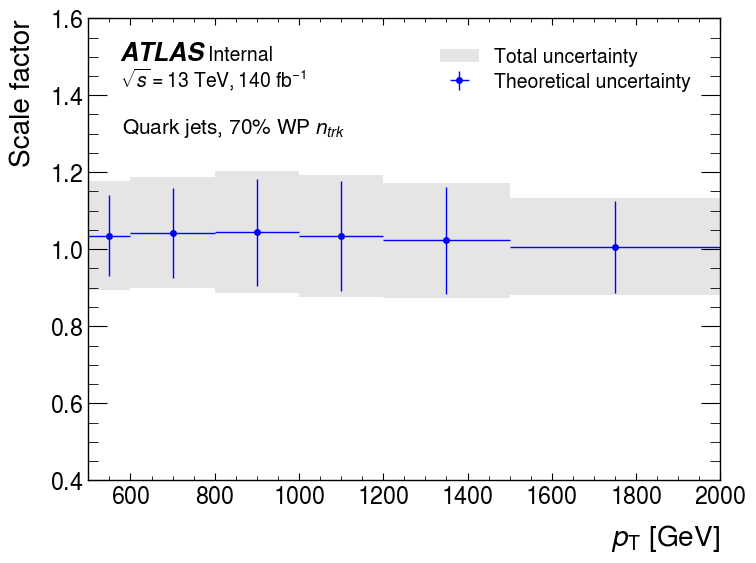

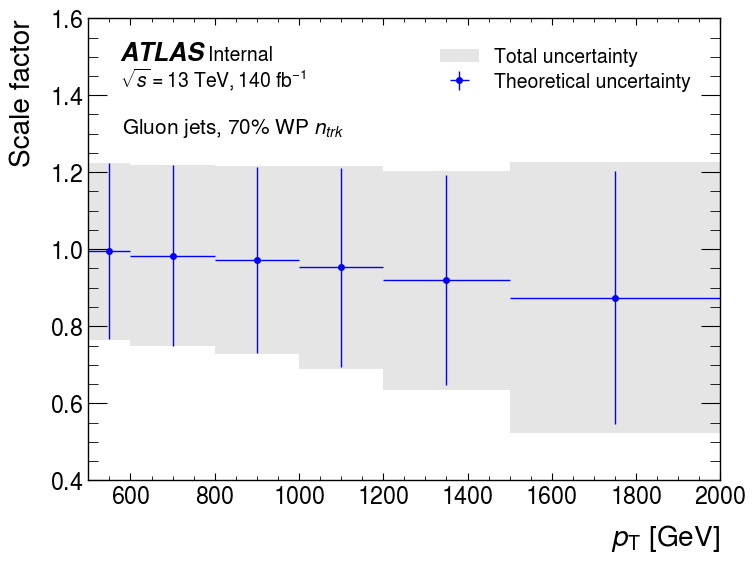

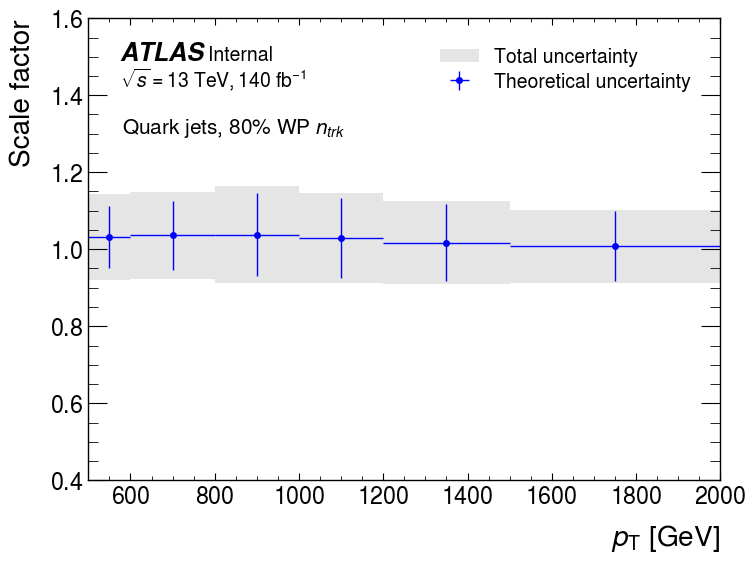

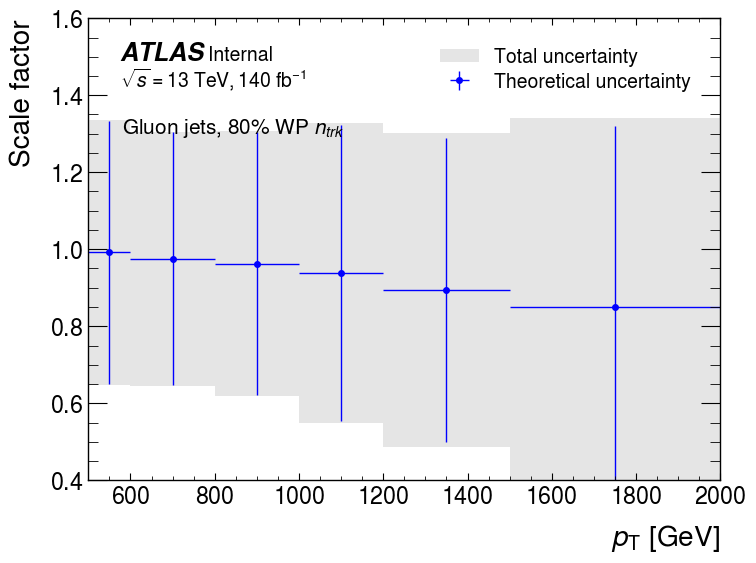

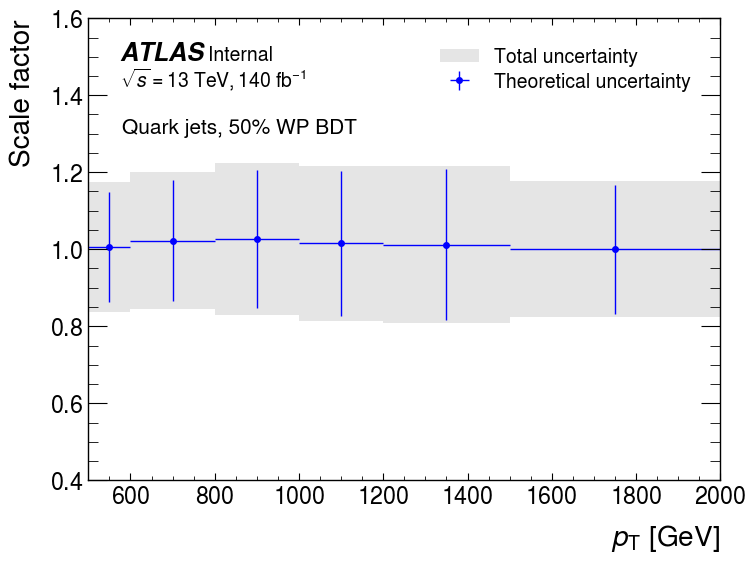

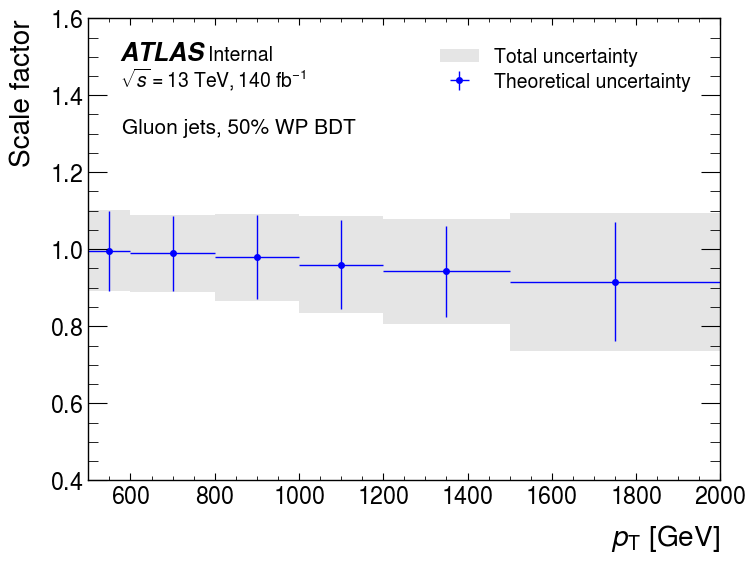

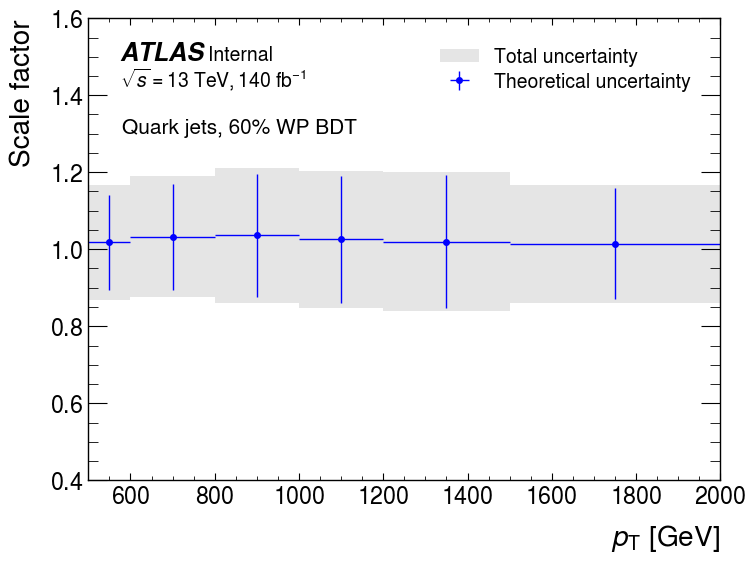

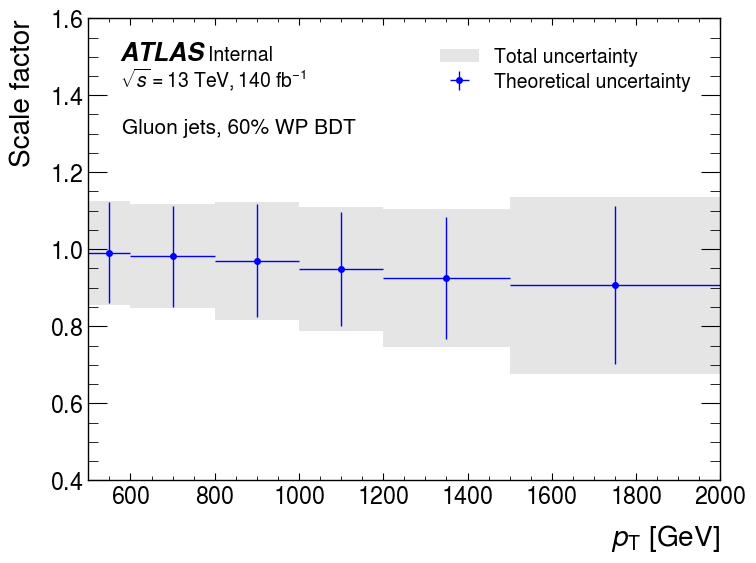

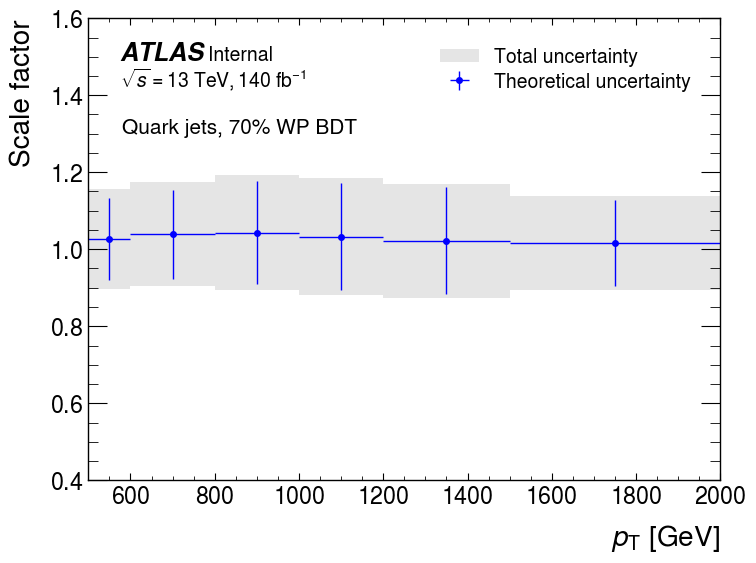

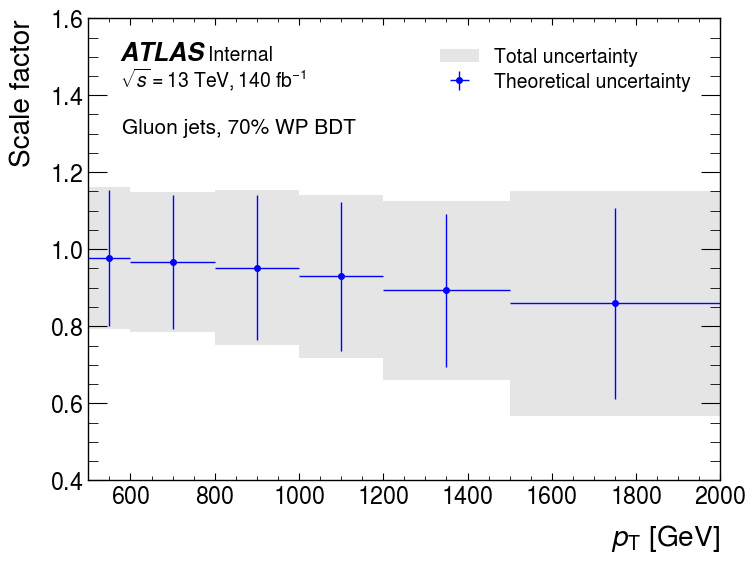

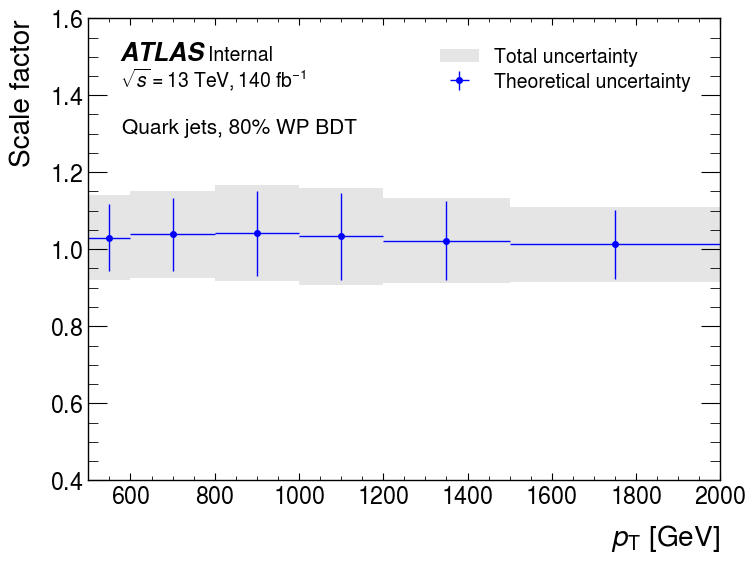

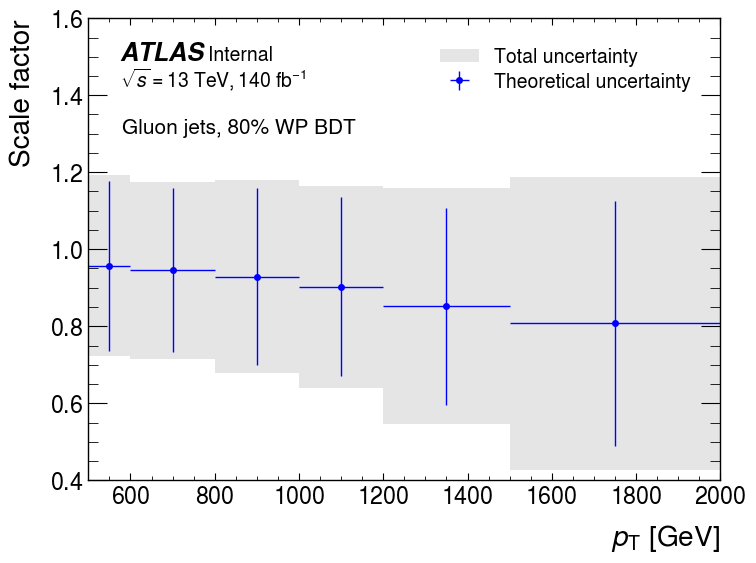

In [8]:
ind = lambda n: ["#%06x" % random.randint(0, 0xFFFFFF) for _ in range(n)]
ind_all = ind(15)

#label_pt_bin = label_eta_bin
bin_centers = 0.5 * (np.array(label_pt_bin[:-1]) + np.array(label_pt_bin[1:]))

yerr_eta = [0.18587531,0.10974434,0.16842143,0.10565531]
yerr_sf = [1.02793334,0.99763966,1.00606012,0.99635244]

e = 0
for i_var, reweighting_var in enumerate(reweighting_vars):

    nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'SFs_pkls'
    nominal_SFs = joblib.load(nominal_path / nominal_keys[i_var] / "SFs.pkl") # this includes many vars with WPs 
    
    for WP in WPs:
        WP1=int(WP*100)
        for parton in ['Quark','Gluon']:
            fig, ax = plt.subplots()
            quark_nominal_values = unumpy.nominal_values(nominal_SFs[reweighting_var][WP][parton])
            q_dev=unumpy.std_devs(nominal_SFs[reweighting_var][WP][parton])

            quark_total_uncertainty = []
            quark_theory_uncertainty = []
            for key in syst_total[reweighting_var].keys():
                indx = list(syst_total[reweighting_var]).index(key)
                indc = ind_all[indx]
                quark_uncertainty = syst_total[reweighting_var][key][WP][parton]
                quark_total_uncertainty.append(syst_total[reweighting_var][key][WP][parton])

                if key == 'JESJER':
                    key = 'JES/JER'

                if key in ['parton_shower','hadrionization','pdf_weight','scale_variation','matrix_element','splitting_kernel']:
                    quark_theory_uncertainty.append(syst_total[reweighting_var][key][WP][parton])
                
                
            quark_theory_uncertainty=np.sqrt(np.sum(np.power(quark_theory_uncertainty, 2), axis=0))
            quark_total_uncertainty = np.sqrt(np.sum(np.power(quark_total_uncertainty, 2), axis=0))

            print(f"{parton} {reweighting_var} SF: ",quark_nominal_values,"syst: ",quark_total_uncertainty)

            hep.histplot(quark_nominal_values+quark_total_uncertainty,bins=label_pt_bin,label='Total uncertainty',ax=ax,histtype='fill',color='grey',alpha=0.2)
            hep.histplot(quark_nominal_values-quark_total_uncertainty,bins=label_pt_bin,ax=ax,histtype='fill',facecolor='white',color='grey',alpha=1)
            hep.histplot(quark_nominal_values,bins=label_pt_bin,label='Theoretical uncertainty',ax=ax,histtype='errorbar',xerr=True,yerr=quark_theory_uncertainty,color='b',marker='o',markersize=4)
            
            #### eta bin
            #hep.histplot(quark_nominal_values,bins=label_pt_bin,label=f'{parton} jets',ax=ax,histtype='errorbar',xerr=True,yerr=q_dev,color='b',marker='o',markersize=4)
            #ax.fill_between(label_pt_bin,yerr_sf[e]-yerr_eta[e], yerr_sf[e]+yerr_eta[e], facecolor = 'orange', alpha=0.3,label='Total uncertainty')
            e+=1
            
            # ax[0].fill_between(bin_centers1, quark_nominal_values-quark_total_uncertainty, quark_nominal_values+quark_total_uncertainty, \
            #                     facecolor='blue', alpha=0.1, label=f'Total uncertainty')

            # ax[1].fill_between(bin_centers1, gluon_nominal_values-gluon_total_uncertainty, gluon_nominal_values+gluon_total_uncertainty, \
            #                     facecolor='red', alpha=0.1, label=f'Total uncertainty')
            #parton_total_uncertainty[reweighting_var][WP]['Quark'] = quark_total_uncertainty
            #parton_total_uncertainty[reweighting_var][WP]['Gluon'] = gluon_total_uncertainty
            ax.set_xlim(label_pt_bin[0], label_pt_bin[-1])
            ax.set_ylim(0.4, 1.6)
            #ax.text(0.1,1.3,f'{parton} jets, {WP1}% WP {Map_var_title[reweighting_var]}',fontsize=15) #580  #0.1
            ax.text(580,1.3,f'{parton} jets, {WP1}% WP {Map_var_title[reweighting_var]}',fontsize=15) #580  #0.1
            ax.set_xlabel('$p_{\mathrm{T}}$ [GeV]')
            #ax.set_xlabel('$\eta$')

            ax.set_ylabel('Scale factor')
            ax.legend()
            hep.atlas.label(label='Internal',ax=ax,lumi=140,data=True)

            fig.savefig(f"../syst/{reweighting_var}_WP{WP}_{parton}_comp.pdf")
            #fig.savefig(f"../syst_uncertainties_note_eta_bin/{reweighting_var}_WP{WP}_{parton}_comp.pdf")


## Draw combined syst

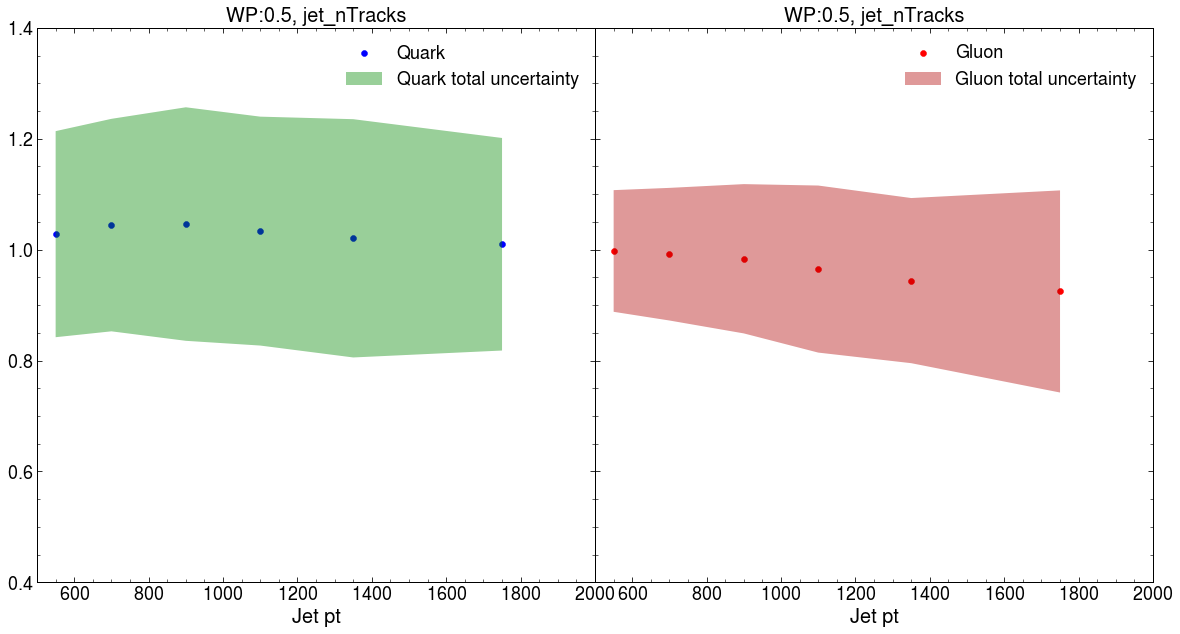

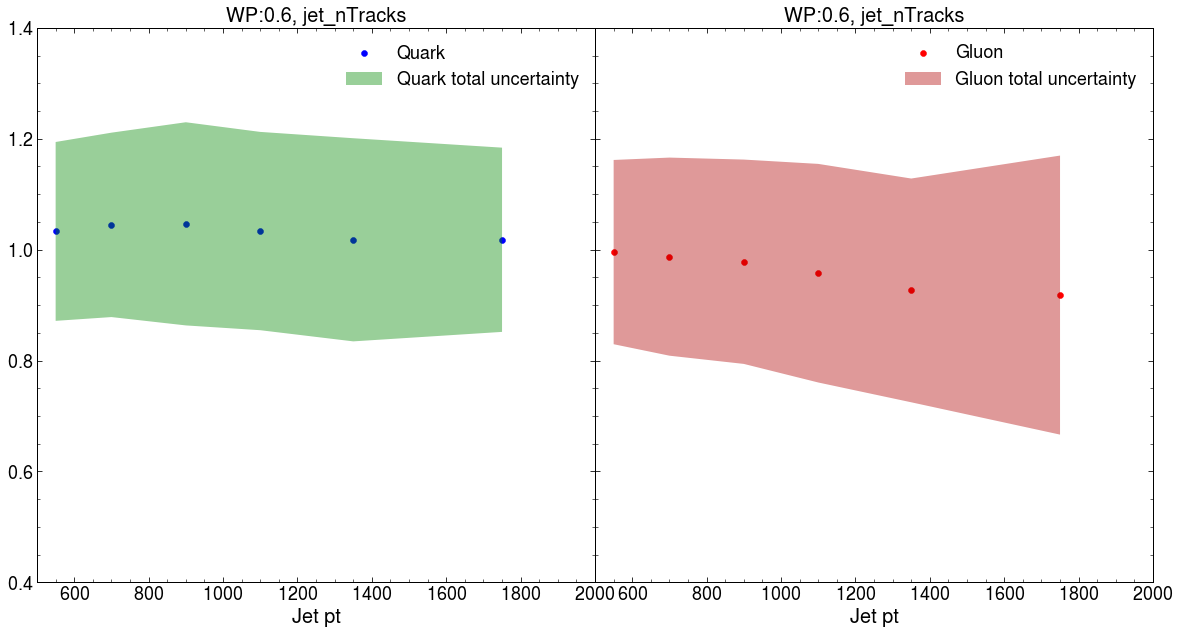

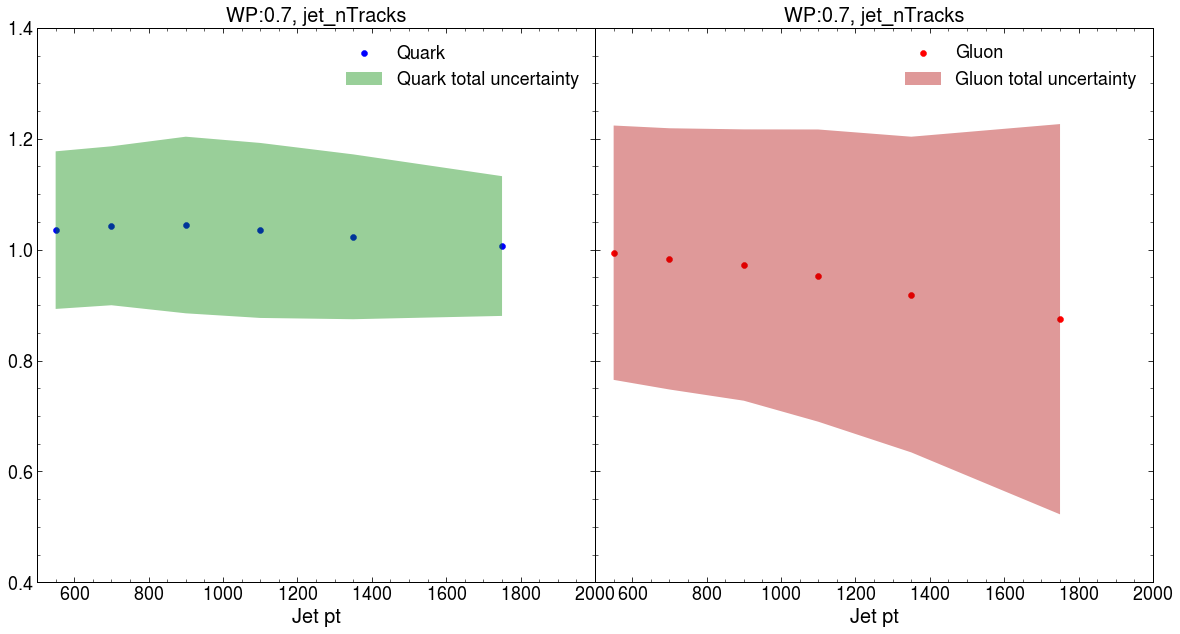

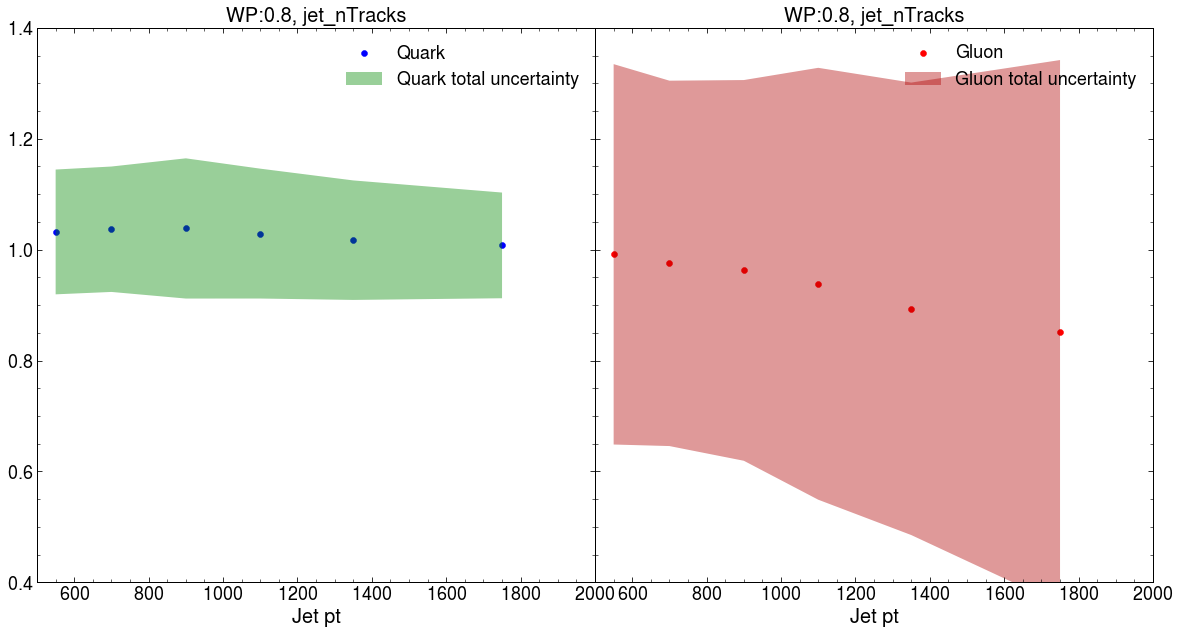

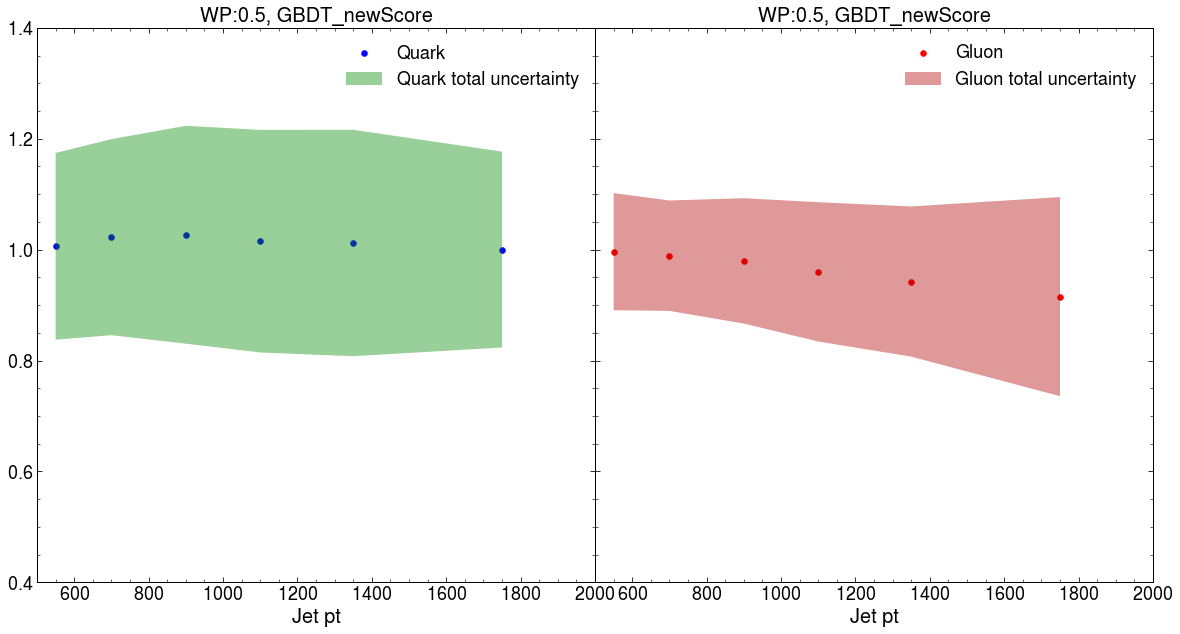

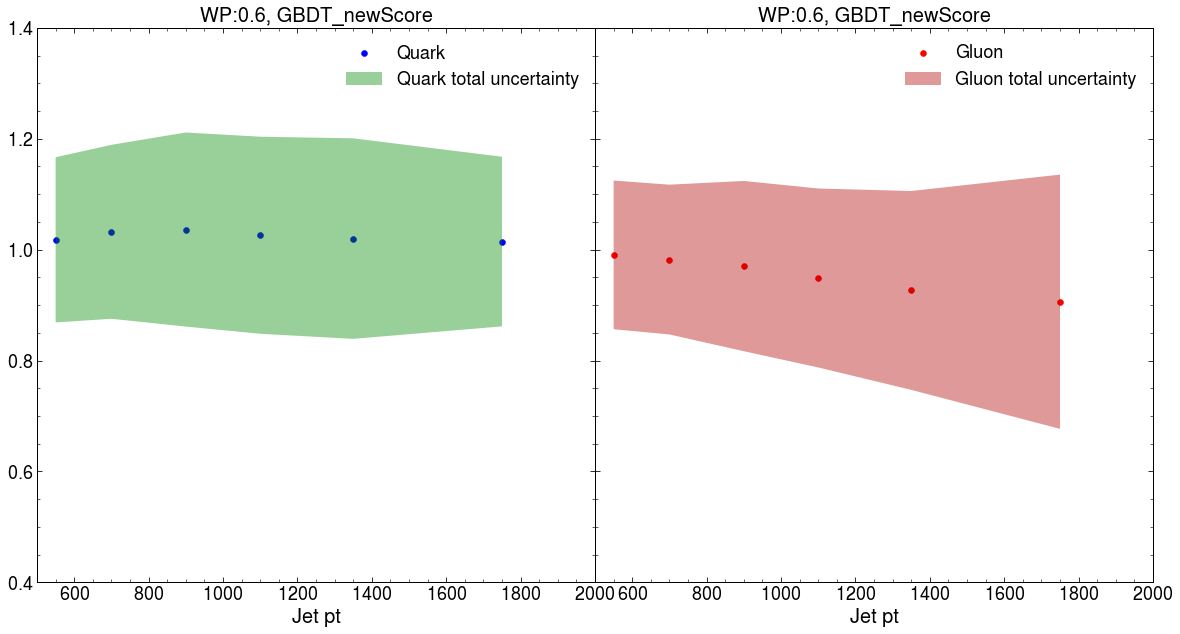

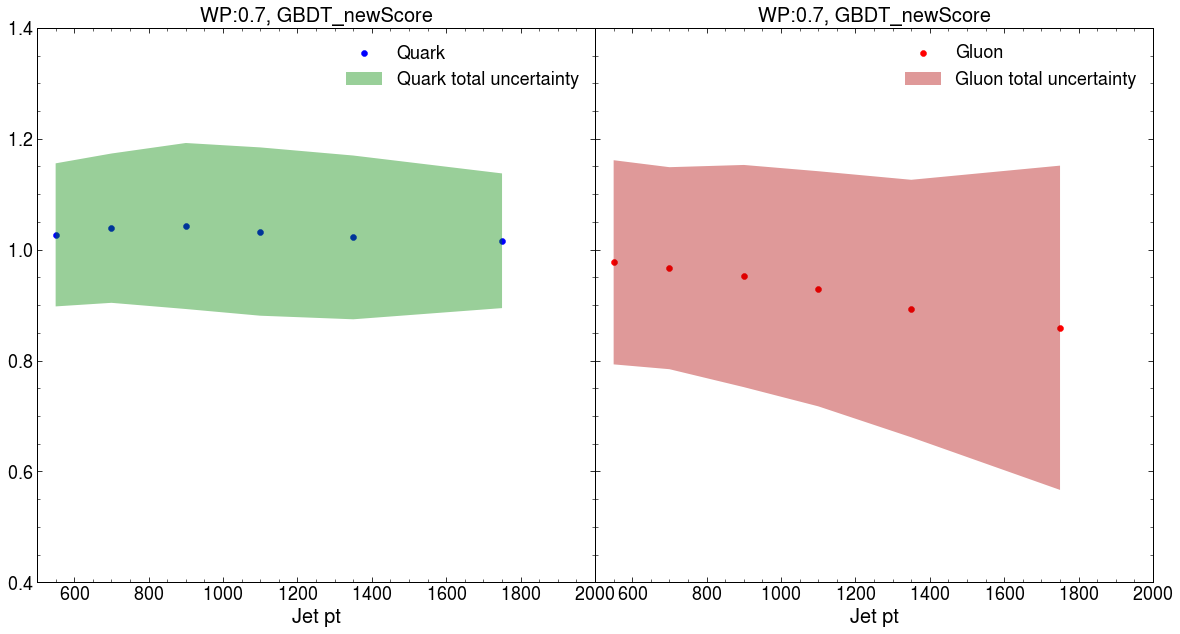

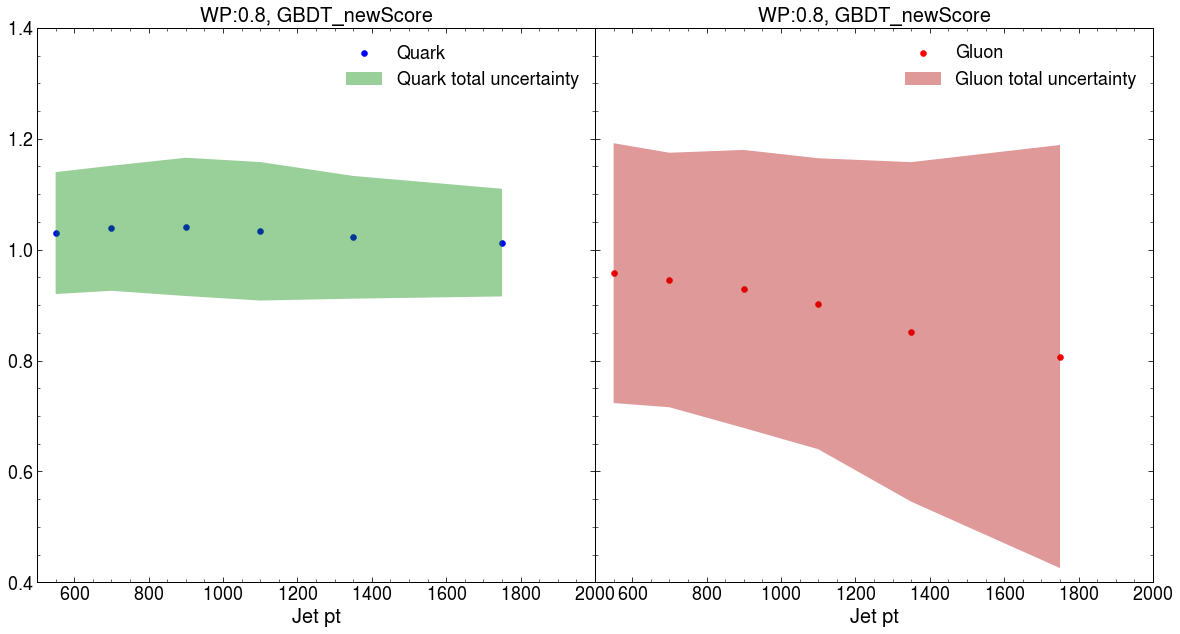

In [12]:

bin_centers = 0.5 * (np.array(label_pt_bin[:-1]) + np.array(label_pt_bin[1:]))
parton_total_uncertainty = dict.fromkeys(reweighting_vars)

for i_var, reweighting_var in enumerate(reweighting_vars):

    nominal_path = pkl_path / 'nominal' / 'plots' / 'ADE' / 'SFs_pkls'
    nominal_SFs = joblib.load(nominal_path / nominal_keys[i_var] / "SFs.pkl") # this includes many vars with WPs 
    parton_total_uncertainty[reweighting_var] = dict.fromkeys(WPs)
    for WP in WPs:
        parton_total_uncertainty[reweighting_var][WP] = dict.fromkeys(['Quark', 'Gluon'])
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,10), sharey=True, gridspec_kw={ 'wspace': 0})
        quark_nominal_values = unumpy.nominal_values(nominal_SFs[reweighting_var][WP]['Quark'])
        gluon_nominal_values = unumpy.nominal_values(nominal_SFs[reweighting_var][WP]['Gluon'])
        ax[0].scatter(bin_centers, quark_nominal_values, label = "Quark",color="blue")
        ax[1].scatter(bin_centers, gluon_nominal_values, label = "Gluon",color="red")

        quark_total_uncertainty = []
        gluon_total_uncertainty = []

        for key in syst_total[reweighting_var].keys():
            quark_total_uncertainty.append(syst_total[reweighting_var][key][WP]['Quark'])
            gluon_total_uncertainty.append(syst_total[reweighting_var][key][WP]['Gluon'])

        quark_total_uncertainty = np.sqrt(np.sum(np.power(quark_total_uncertainty, 2), axis=0))
        gluon_total_uncertainty = np.sqrt(np.sum(np.power(gluon_total_uncertainty, 2), axis=0))
        
        ax[0].fill_between(bin_centers, quark_nominal_values-quark_total_uncertainty, quark_nominal_values+quark_total_uncertainty, \
                            facecolor='C0', alpha=0.4, label=f'Quark total uncertainty')

        ax[1].fill_between(bin_centers, gluon_nominal_values-gluon_total_uncertainty, gluon_nominal_values+gluon_total_uncertainty, \
                            facecolor='C1', alpha=0.4, label=f'Gluon total uncertainty')
        parton_total_uncertainty[reweighting_var][WP]['Quark'] = quark_total_uncertainty
        parton_total_uncertainty[reweighting_var][WP]['Gluon'] = gluon_total_uncertainty
        # ax.scatter(bin_centers, unumpy.nominal_values(nominal_SFs['jet_nTracks'][WP]['Gluon']), label = "Gluon")
        for i in range(len(ax)):
            ax[i].set_xlim(label_pt_bin[0], label_pt_bin[-1])
            ax[i].set_ylim(0.4, 1.4)
            ax[i].set_title(f"WP:{WP}, {reweighting_var}")
            ax[i].set_xlabel("Jet pt")
            ax[i].legend()
            #ampl.draw_atlas_label(0.1, 0.85, ax=ax[i], energy="13 TeV")

        fig.savefig(f"./syst_uncertainties/{reweighting_var}_WP{WP}_combined.jpg")


In [18]:
joblib.dump(syst_total, "syst_total.pkl")

['syst_total.pkl']

In [19]:
joblib.dump(parton_total_uncertainty, "parton_total_uncertainty.pkl")

['parton_total_uncertainty.pkl']

In [23]:
syst_total['jet_nTracks']['splitting_kernel']

{0.5: {'Quark': array([0.00479377, 0.00373218, 0.00618231, 0.01190659, 0.01192551,
         0.00554446]),
  'Gluon': array([0.02307621, 0.00340092, 0.00330859, 0.00972244, 0.00612659,
         0.00879747])},
 0.6: {'Quark': array([0.00679909, 0.00038772, 0.00939995, 0.01768852, 0.01266658,
         0.00177794]),
  'Gluon': array([0.03366858, 0.00786916, 0.00949555, 0.01128397, 0.00282307,
         0.01520322])},
 0.7: {'Quark': array([0.00959693, 0.00477607, 0.01219916, 0.02016862, 0.01713152,
         0.00392115]),
  'Gluon': array([0.04365054, 0.01102636, 0.01449581, 0.01321997, 0.00154817,
         0.01148519])},
 0.8: {'Quark': array([0.00906792, 0.00733398, 0.01371802, 0.0179946 , 0.01580308,
         0.0053429 ]),
  'Gluon': array([0.06587212, 0.01909747, 0.0238449 , 0.03009573, 0.01262439,
         0.02484032])}}

In [20]:
parton_total_uncertainty

{'jet_nTracks': {0.5: {'Quark': array([0.18585691, 0.19164053, 0.21062485, 0.20645033, 0.21489485,
          0.19169785]),
   'Gluon': array([0.10972334, 0.11961314, 0.13465004, 0.15066548, 0.14893562,
          0.1822982 ])},
  0.6: {'Quark': array([0.16131077, 0.16631016, 0.18323686, 0.17884367, 0.18321393,
          0.16615847]),
   'Gluon': array([0.16617617, 0.17866711, 0.18429588, 0.19714382, 0.20181045,
          0.25164855])},
  0.7: {'Quark': array([0.14214463, 0.14334478, 0.15928762, 0.15783645, 0.14866932,
          0.12604009]),
   'Gluon': array([0.22939114, 0.23559411, 0.2447131 , 0.26354632, 0.28469486,
          0.35199699])},
  0.8: {'Quark': array([0.11255132, 0.11310967, 0.12646322, 0.11713234, 0.10777963,
          0.09532423]),
   'Gluon': array([0.34306785, 0.32952601, 0.34335404, 0.3895073 , 0.40806833,
          0.49090712])}},
 'GBDT_newScore': {0.5: {'Quark': array([0.16841092, 0.17684388, 0.19647771, 0.20075571, 0.20418881,
          0.17664429]),
   'Gluon':